# Cosine Wave Demo

A cosine-wave signel $s(t)$ with amplitude $A$, frequency $f$, and phase $\phi$ is defined by
$$s(t) = cos(2\pi ft + \phi)$$ .

The period $T$ of the signal is the time it takes to complete one cycle. This is the time it takes for the instantaneous phase $2\pi ft + \phi$ to change by $2\pi$,
\begin{align}
    2\pi f(t+T) + \phi  &= 2\pi ft + \phi + 2\pi & &\text{ giving } &
    T & = \frac{1}{f}
\end{align}

The delay $t_d$ is the time-shift relative to a wave with phase $\phi=0$, 
\begin{align}
    2\pi f(t-t_d)  &= 2\pi ft + \phi& &\text{ giving } &
    t_d & = -\frac{\phi}{2\pi f}
\end{align}

In [50]:
# Code to calcultae and plot result
import numpy as np
from math import pi
import matplotlib.pyplot as plt

# Allow interactive figures in Matplotlig
%matplotlib ipympl


class CosineDemo:
    """Demonstation of first order system step response.

    All calculations and plotting routines are contained in this class
    """

    def __init__(self, A=1, f=1, phase=0):
        """Initialise system parameters."""
        self.A = A        # Amplitude
        self.f = f        # Frequency
        self.fs = 10        # sample rate
        self.phase = phase  # Phase [degrees]
        self.t_min = -0.5
        self.t_max = 2.0
        self.A_max = 2.0
        self.show_samples = True
        self.ax = self.initialise_graphs()

    def initialise_graphs(self):
        """Initialise result graph ."""
        plt.close("all")
        plt.rc('font', size=10)          # Default text sizes
        fig = plt.figure(figsize=[12, 4],
                         constrained_layout=True,
                         num="Cosine wave demo")
        ax = fig.add_subplot(1, 1, 1)

        ax.set(xlabel=r"Time $t$ [s]",
               ylabel=r"$s(t)$",
               title=r"$s(t)=Acos(2\pi f t + \phi)$",
               xlim=(self.t_min, self.t_max),
               ylim=self.A_max*np.array([-1, 1]))
        ax.grid(False)

        return ax

    def T(self):
        """Period of wave."""
        return 1/self.f

    def phi(self):
        """Phase in radians."""
        return np.radians(self.phase)

    def t(self):
        """Create time vector for 'continous' signal."""
        return np.linspace(self.t_min, self.t_max, 300)

    def ts(self):
        """Create time vector from samples."""
        return np.arange(self.t_min, self.t_max, 1/self.fs)

    def _cos_wave(self, A, f, t, phi):
        """Calculate cosine-wave."""
        s = A * np.cos(2*pi*f*t + phi)
        return s

    def s(self):
        """Get continous cosine-wave."""
        s = self._cos_wave(self.A, self.f, self.t(), self.phi())
        return s

    def ss(self):
        """Get continous cosine-wave."""
        ss = self._cos_wave(self.A, self.f, self.ts(), self.phi())
        return ss

    def plot(self):
        """Plot result in graph."""
        # Remove old plots and markers
        for art in list(self.ax.lines):
            art.remove()
        for art in list(self.ax.collections):
            art.remove()
        for art in list(self.ax.texts):
            art.remove()

        # Plot signal
        self.ax.plot(self.t(), self.s(), "-", color="C0")
        if self.show_samples:
            self.ax.stem(self.ts(), self.ss(), "-", linefmt="C0")

        # Markers and annotations
        self.ax.axvline(0, color="gray")  # Line at t=0
        self.ax.axhline(0, color="gray")  # Line at s=0

        y_text = 1.1*self.A   # y-position of markers and texts
        id = np.ones(2)       # Array [1, 1] to draw lines
        rot = 10              # Rotation of text 

        # Amplitude marker
        col = "C3"
        t0 = (1-self.phi()/(2*pi))/self.f  # Position of wave-crest, phase=2*pi
        self.ax.stem(t0, self.A, linefmt=col)
        self.ax.text(t0, self.A,
                     f" Amplitude= {self.A:.2f}",
                     color=col,
                     horizontalalignment="left",
                     rotation = rot,
                     verticalalignment="bottom")

        # Period marker
        t0 = (1-self.phi()/pi)/(2*self.f)  # Position of wave-through, phase=pi
        self.ax.plot([t0, t0+self.T()], -self.A*id, "-|", color=col)
        self.ax.text(t0+self.T()/2, -y_text,
                     f" Period $T= 1/f=${self.T():.2f} s",
                     color=col,
                     horizontalalignment="center",
                     verticalalignment="top")

        # Delay marker
        t_d = -self.phi()/(2*pi*self.f)  # Position of wave-crest, phase=0
        self.ax.plot([0, t_d], self.A*id, "-|", color=col)
        self.ax.text(t_d, self.A,
                     fr" Delay $t_d=-\phi/(2\pi f)=${t_d:.2f} s",
                     color=col,
                     horizontalalignment="left",
                     rotation = rot,
                     verticalalignment="bottom")

        # Sample rate text
        if self.show_samples:
            ts_text = 0.8*self.t_max
            self.ax.text(ts_text, 1.5,
                         fr" Sample rate $f_s = {self.fs/self.f:.1f} \: f_0$ ",
                         color="black",
                         horizontalalignment="center",
                         verticalalignment="bottom")


        return 0


Label(value='Cosine wave demo', style=LabelStyle(font_weight='bold'))

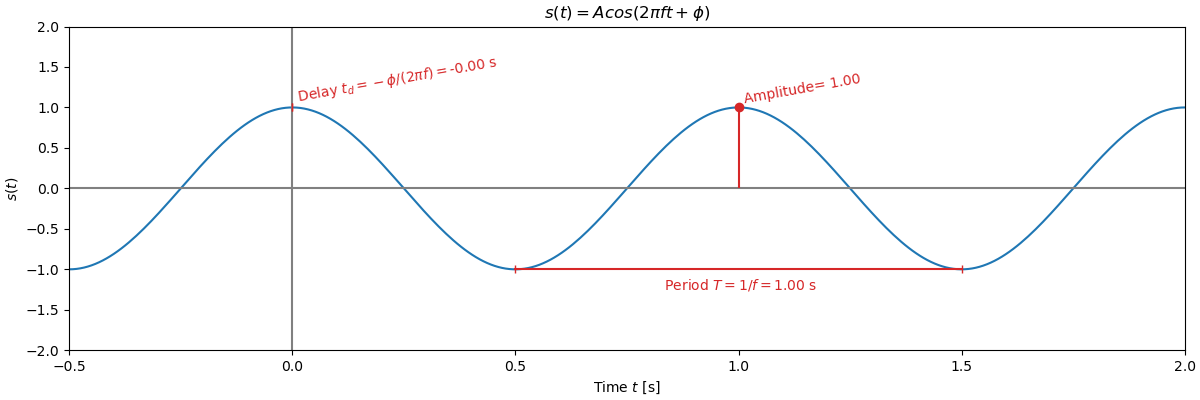

In [52]:
# Widgets to display the results interctively

# Load modules for intereactive operation
import ipywidgets as widgets

#  Function that runs the demo interactively
def run_cosinedemo(A, f, phase, fs, show_samples):
    """Set values and call plotting function."""
    signal.A = A
    signal.f = f
    signal.phase = phase
    signal.fs = fs
    signal.show_samples = show_samples
    signal.plot()
    
    return

# Define widgets to operate program
widget_style = dict(description_width='initial')

title_widget = widgets.Label("Cosine wave demo", 
                             style=dict(font_weight='bold'))

A_widget = widgets.FloatSlider(min=0, max= 2, value=1.0, step=0.01, 
                                 description='Amplitude ',  
                                 readout_format='.2f',
                                 layout=widgets.Layout(width='60%'),
                                 orientation='horizontal',
                                 style=widget_style)

f_widget = widgets.FloatSlider(min=0.1, max= 5, value=1, step=0.01, 
                                 description='Frequency [Hz]',  
                                 readout_format='.2f',
                                 layout=widgets.Layout(width='60%'), 
                                 style=widget_style)

phase_widget = widgets.FloatSlider(min=-360, max= 360, value=0, step=5, 
                                 description='Phase [deg]',  
                                 readout_format='.0f',
                                 layout=widgets.Layout(width='60%'),
                                 style=widget_style)

fs_widget = widgets.FloatSlider(min=0.5, max= 50, value=10, step=0.5,
                                     description='Sample Rate [samples/s]',  
                                     readout_format='.1f',
                                     layout=widgets.Layout(width='60%'), 
                                     style=widget_style)

show_samples_widget = widgets.ToggleButton(value=False,
                                           description='Show samples',
                                           button_style='info', 
                                           icon='check',
                                           layout=widgets.Layout(width='10%'), 
                                           style=widget_style)


widget_line_1 = widgets.HBox([fs_widget, show_samples_widget])

widget_box = widgets.VBox([widget_line_1, A_widget, f_widget, phase_widget ])

display(title_widget)
display(widget_box)

# Define signal and run demo
signal = CosineDemo()
w = widgets.interactive(run_cosinedemo, A=A_widget, f=f_widget, phase=phase_widget, fs=fs_widget, show_samples=show_samples_widget)